In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 200
nx = 800
nz = 400
fd_list = []
for i in range(n):
    i = 10*i
    fd = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/flame_distance"+str(i)+".dat"))
    fd = fd.reshape(nx,nz)
    fd_list.append(fd)
fpx_list = []
fpz_list = []
for i in range(n):
    i = 10*i
    fp = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/flame_posit"+str(i)+".dat"))
    fpx_list.append(fp[:,0])
    fpz_list.append(fp[:,1])
Hdx_list = []
Hdz_list = []
for i in range(n):
    i = 10*i
    Hd = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/H_d"+str(i)+".dat"))
    Hdx_list.append(Hd[:,0].reshape(nx,nz))
    Hdz_list.append(Hd[:,1].reshape(nx,nz))
bscaG1_list = []
for i in range(n):
    i = 10*i
    bscaG1 = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/scaG1_before"+str(i)+".dat"))
    bscaG1 = bscaG1.reshape(nx,nz)
    bscaG1_list.append(bscaG1)
ascaG1_list = []
for i in range(n):
    i = 10*i
    ascaG1 = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/scaG1_after"+str(i)+".dat"))
    ascaG1 = ascaG1.reshape(nx,nz)
    ascaG1_list.append(ascaG1)
prim_list = []
for i in range(n):
    i = 10*i
    prim = np.array(np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/prim"+str(i)+".dat"))
    prim = prim.reshape(nx,nz)
    prim_list.append(prim)


In [3]:
t = n-1
fd = Hdx_list[t]
Hd = Hdz_list[t]
top = 550
bottom = 250
right = 90

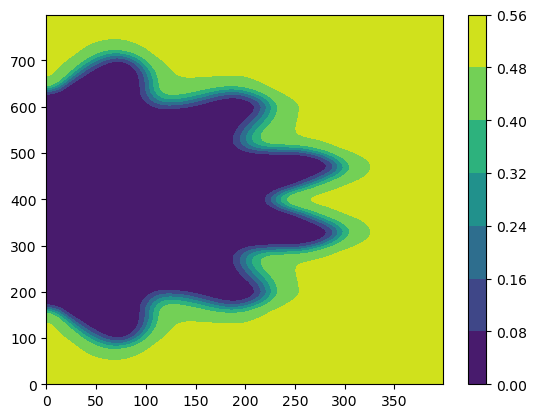

In [18]:
plt.contourf(prim_list[t-1])
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

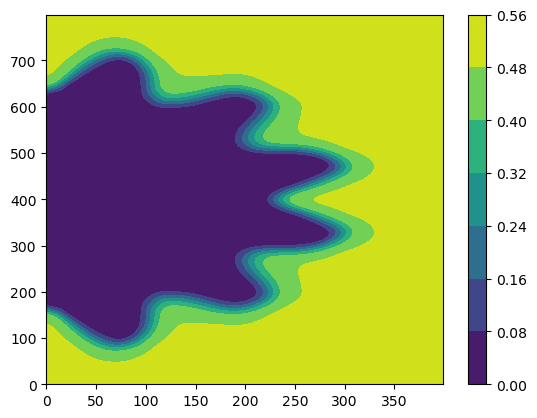

In [19]:
plt.contourf(prim_list[t])
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

/tmp/ipykernel_2647/648378377.py:1: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log(ascaG1_list[t-1]),cmap='inferno')


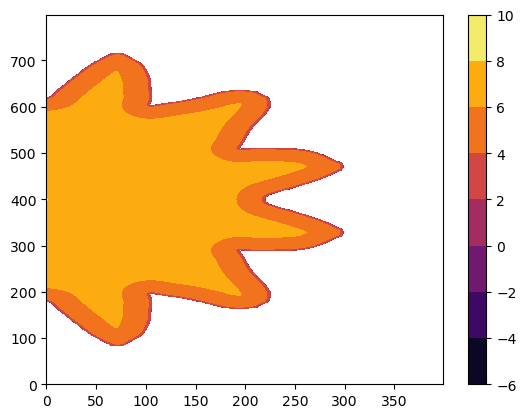

In [20]:
plt.contourf(np.log(ascaG1_list[t-1]),cmap='inferno')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

/tmp/ipykernel_2647/1475336732.py:1: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log(-ascaG1_list[t-1]),cmap='inferno_r')


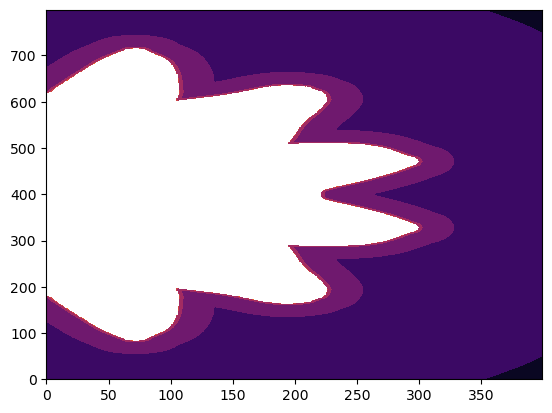

In [21]:
plt.contourf(np.log(-ascaG1_list[t-1]),cmap='inferno_r')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
# plt.colorbar()

/tmp/ipykernel_2647/1732739778.py:1: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log(bscaG1_list[t]),cmap='inferno')


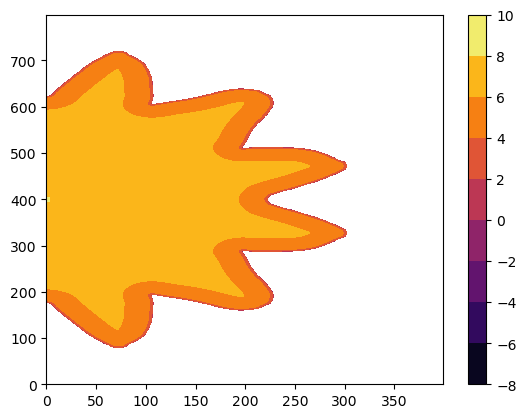

In [22]:
plt.contourf(np.log(bscaG1_list[t]),cmap='inferno')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

/tmp/ipykernel_2647/3170753465.py:1: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log(-bscaG1_list[t]),cmap='inferno_r')


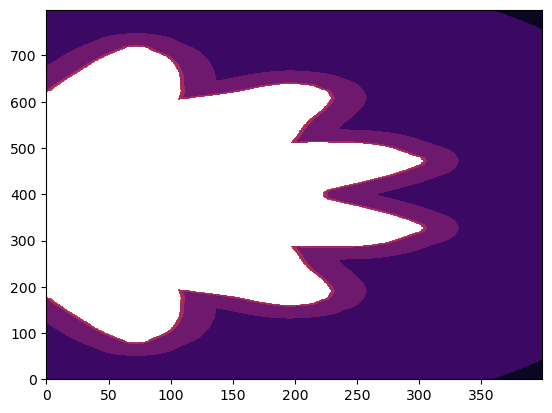

In [23]:
plt.contourf(np.log(-bscaG1_list[t]),cmap='inferno_r')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
# plt.colorbar()

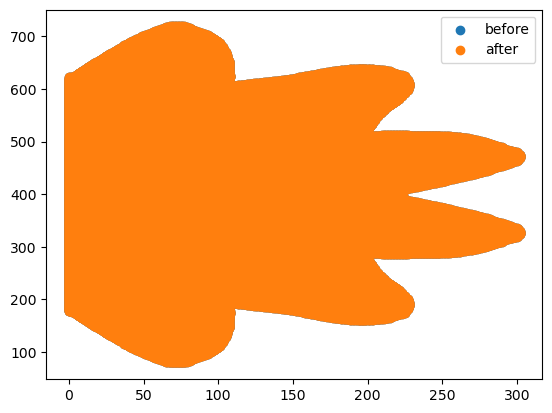

In [10]:
plt.scatter(np.argwhere(bscaG1_list[t]>=0)[:,1], np.argwhere(bscaG1_list[t]>=0)[:,0],label='before')
plt.scatter(np.argwhere(ascaG1_list[t]>=0)[:,1], np.argwhere(ascaG1_list[t]>=0)[:,0],label='after')
plt.legend()

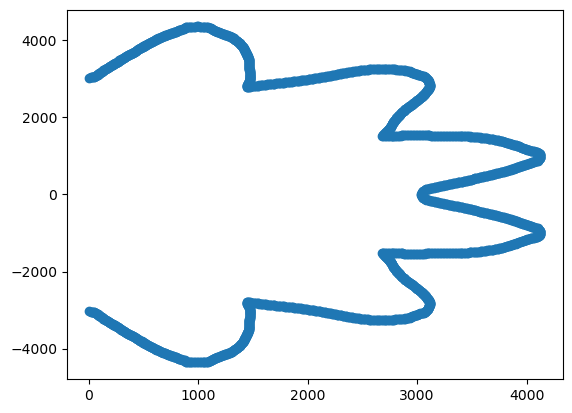

In [11]:
plt.scatter(fpx_list[t], fpz_list[t])

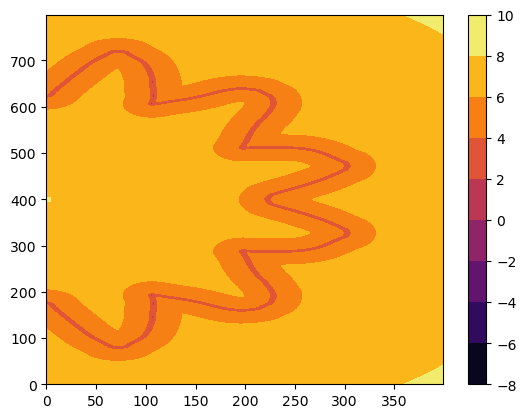

In [24]:
plt.contourf(np.log(fd), cmap='inferno')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

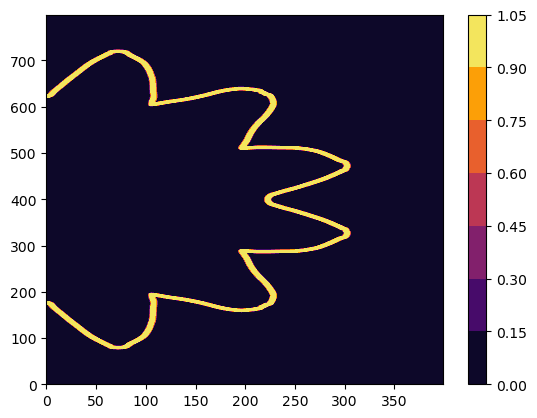

In [25]:
plt.contourf(Hd, cmap='inferno')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

/tmp/ipykernel_2647/772508265.py:1: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log(-ascaG1_list[t]),cmap='inferno_r')


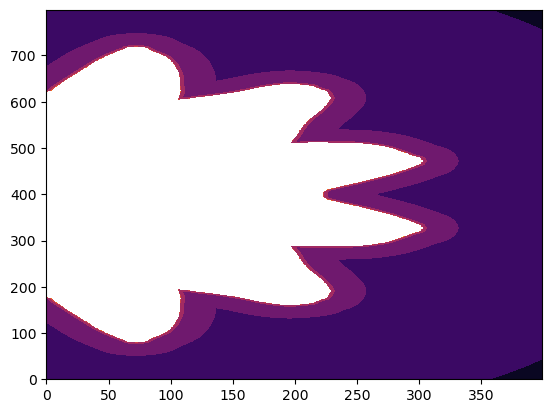

In [26]:
plt.contourf(np.log(-ascaG1_list[t]),cmap='inferno_r')
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
# plt.colorbar()

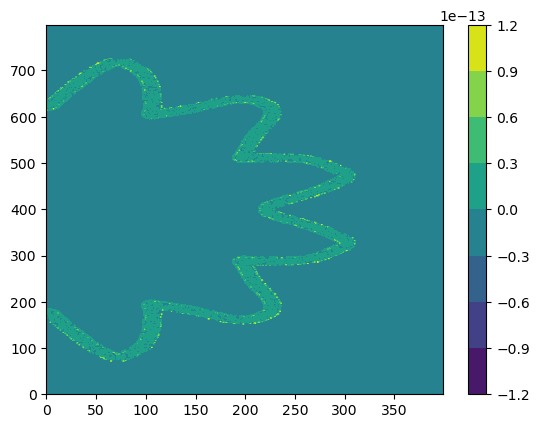

In [27]:
err = ascaG1_list[t] - (Hd*bscaG1_list[t]+(1-Hd)*fd*np.sign(bscaG1_list[t]))
plt.contourf(err)
# plt.ylim(top=top,bottom=bottom)
# plt.xlim(right=right)
plt.colorbar()

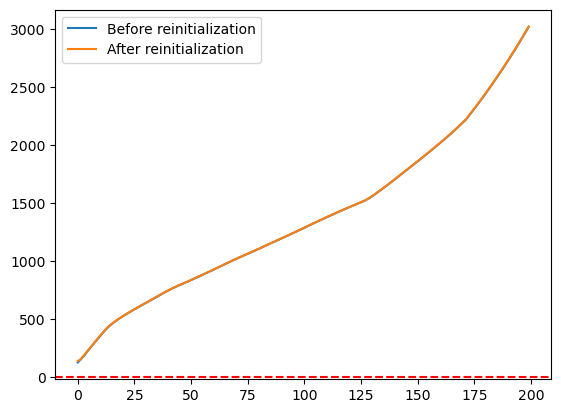

In [28]:
beq_list = []
aeq_list = []
xpoint = 400
ypoint = 1
for i in bscaG1_list:
    beq_list.append(i[xpoint,ypoint])
plt.plot(beq_list,label='Before reinitialization')
for i in ascaG1_list:
    aeq_list.append(i[xpoint,ypoint])
plt.plot(aeq_list,label='After reinitialization')
plt.axhline(y=0, linestyle='dashed', color='red')
plt.legend()

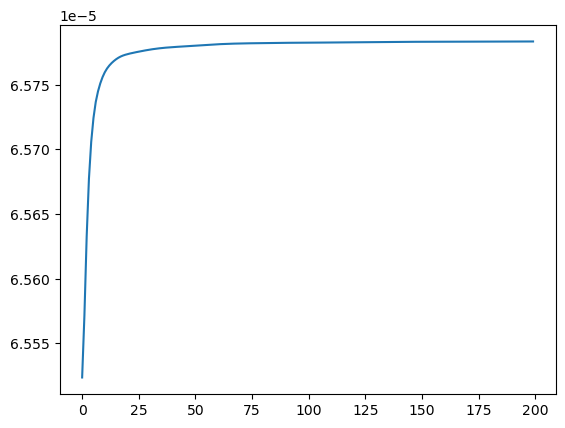

In [17]:
primeq_list = []
for i in prim_list:
    primeq_list.append(i[xpoint,ypoint])
plt.plot(primeq_list)